In [1]:
import torch
import torch.nn as nn
import torch.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision 
from torchvision import transforms
import os

import glob
from PIL import Image

In [2]:
torch.__version__

'1.9.0'

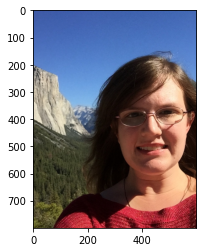

In [3]:
pil_img = Image.open(r'D:\ML data\Pytorch_material\HKdataset\training\00001.png')
np_img = np.array(pil_img)
plt.imshow(np_img)

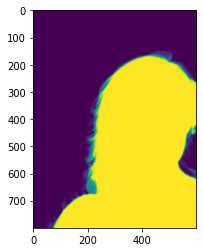

In [4]:
pil_img1 = Image.open(r'D:\ML data\Pytorch_material\HKdataset\training\00001_matte.png')
np_img1 = np.array(pil_img1)
plt.imshow(np_img1)

In [5]:
np.unique(np_img1)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [6]:
np_img1.max(), np_img1.min()

(255, 0)

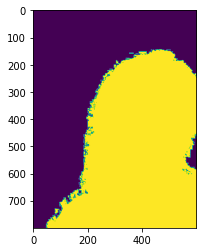

In [7]:
pil_img1 = Image.open(r'D:\ML data\Pytorch_material\HKdataset\training\00001_matte.png')
np_img1 = np.array(pil_img1)
np_img1[np_img1>0] = 1

plt.imshow(np_img1)

In [8]:
np_img1.max(), np_img1.min()

(1, 0)

In [9]:
np_img1.shape

(800, 600)

In [10]:
all_pics = glob.glob(r'D:\ML data\Pytorch_material\HKdataset\training\*.png')

In [11]:
all_pics[:5]

['D:\\ML data\\Pytorch_material\\HKdataset\\training\\00001.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00001_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00002.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00002_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00003.png']

In [12]:
images = [p for p in all_pics if 'matte' not in p]

In [13]:
images[:5]

['D:\\ML data\\Pytorch_material\\HKdataset\\training\\00001.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00002.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00003.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00004.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00005.png']

In [14]:
anno = [p for p in all_pics if 'matte' in p]

In [15]:
anno[:5]

['D:\\ML data\\Pytorch_material\\HKdataset\\training\\00001_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00002_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00003_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00004_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00005_matte.png']

In [16]:
len(images), len(anno)

(1700, 1700)

In [17]:
images[-3:]

['D:\\ML data\\Pytorch_material\\HKdataset\\training\\01698.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01699.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01700.png']

In [18]:
anno[-3:]

['D:\\ML data\\Pytorch_material\\HKdataset\\training\\01698_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01699_matte.png',
 'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01700_matte.png']

In [19]:
np.random.seed(2021)
index = np.random.permutation(len(images))
index

array([ 371, 1289,   62, ...,   57, 1365, 1140])

In [20]:
images = np.array(images)[index]
anno = np.array(anno)[index]

In [21]:
images[:3]

array(['D:\\ML data\\Pytorch_material\\HKdataset\\training\\00372.png',
       'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01290.png',
       'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00063.png'],
      dtype='<U56')

In [22]:
anno[:3]

array(['D:\\ML data\\Pytorch_material\\HKdataset\\training\\00372_matte.png',
       'D:\\ML data\\Pytorch_material\\HKdataset\\training\\01290_matte.png',
       'D:\\ML data\\Pytorch_material\\HKdataset\\training\\00063_matte.png'],
      dtype='<U62')

In [23]:
all_test_pics = glob.glob(r'D:\ML data\Pytorch_material\HKdataset\testing\*.png')

In [24]:
test_images = [p for p in all_test_pics if 'matte' not in p]
test_anno = [p for p in all_test_pics if 'matte' in p]

In [25]:
transform = transforms.Compose([
                               transforms.Resize((256, 256)),
                               transforms.ToTensor(),   
    
])

In [26]:
class hk_dataset(data.Dataset):
    def __init__(self, imgs_path, annos_path):
        self.imgs_path = imgs_path
        self.annos_path = annos_path
#         self.transform = transform = transforms.Compose([
#             transforms.Resize((256, 256)),
#             transforms.ToTensor()]) #jia
            
    def __getitem__(self, index):
        img = self.imgs_path[index]
        anno = self.annos_path[index]
        
        pil_img = Image.open(img)
        img_tensor = transform(pil_img)
        
        anno_img = Image.open(anno)
        annos_tensor = transform(anno_img) #gai
        annos_tensor = torch.squeeze(annos_tensor).type(torch.long)
        annos_tensor[annos_tensor>0] = 1
        
        return img_tensor, annos_tensor
    
    def __len__(self):
        return len(self.imgs_path)

In [27]:
train_ds = hk_dataset(images,anno)
test_ds = hk_dataset(test_images, test_anno)

In [28]:
BATCH_SIZE = 2

In [29]:
train_dl = data.DataLoader(train_ds,
                           batch_size =BATCH_SIZE,
                           shuffle=True)

In [30]:
test_dl = data.DataLoader(test_ds,
                          batch_size = BATCH_SIZE,
                         )

In [31]:
img_batch, anno_batch = next(iter(train_dl))

In [32]:
img_batch.shape, anno_batch.shape

(torch.Size([2, 3, 256, 256]), torch.Size([2, 256, 256]))

In [33]:
img = img_batch[0].permute(1,2,0).numpy()
anno = anno_batch[0].numpy()

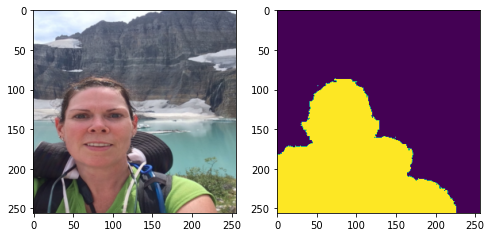

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(anno)

In [35]:
class Downsample(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Downsample, self).__init__()
        self.conv_relu = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),            
        )
        
        self.pool = nn.MaxPool2d(kernel_size=2)
        
    def forward(self, x, is_pool=True): #is_pool 表示是否需要下采样, 因为UNet除了第一层外其他都有下采样
        if is_pool:
            x = self.pool(x)
        x = self.conv_relu(x)
        return x

In [36]:
# class Upsample(nn.Module):
#     def __init__(self, channels): #channels为卷积的数量，卷积之前为2*channels
#         super(Upsample, self).__init__()
#         self.conv_relu = nn.Sequential(
#             nn.Conv2d(2*channels, channels, kernel_size=3, padding=1),
#             nn.ReLU(), #inplace表示直接覆写原数据，可节约内存，不建议
#             nn.Conv2d(channels, channels, kernel_size=3, padding=1),
#             nn.ReLU())
        
#         self.upconv = nn.Sequential(
#             nn.ConvTranspose2d(channels, channels//2, kernel_size=3, #/2
#                                stride=2, output_padding=1)        
#         )
    
#     def forward(self, x):
#         x = self.conv_relu(x)
#         x = self.upconv(x)
#         return x

In [37]:
class Upsample(nn.Module):
    def __init__(self, channels):
        super(Upsample, self).__init__()
        self.conv_relu = nn.Sequential(
                            nn.Conv2d(2*channels, channels, 
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True),
                            nn.Conv2d(channels, channels,  
                                      kernel_size=3, padding=1),
                            nn.ReLU(inplace=True)
            )
        self.upconv_relu = nn.Sequential(
                               nn.ConvTranspose2d(channels, 
                                                  channels//2, 
                                                  kernel_size=3,
                                                  stride=2,
                                                  padding=1,
                                                  output_padding=1),
                               nn.ReLU(inplace=True)
            )
        
    def forward(self, x):
        x = self.conv_relu(x)
        x = self.upconv_relu(x)
        return x

In [38]:
class Unet_model(nn.Module):
    def __init__(self):
        super(Unet_model, self).__init__()
        self.down1 = Downsample(3, 64)
        self.down2 = Downsample(64, 128)
        self.down3 = Downsample(128, 256)
        self.down4 = Downsample(256, 512)
        self.down5 = Downsample(512, 1024)
        
        self.up = nn.Sequential(
                               nn.ConvTranspose2d(1024, 
                                                  512, 
                                                  kernel_size=3,
                                                  stride=2,
                                                  padding=1,
                                                  output_padding=1),
                               nn.ReLU(inplace=True)
            )
        
        self.up1 = Upsample(512)
        self.up2 = Upsample(256)
        self.up3 = Upsample(128)
        
        self.conv_2 = Downsample(128, 64)
        self.last = nn.Conv2d(64, 2, kernel_size=1)

    def forward(self, x):
        x1 = self.down1(x, is_pool=False)
        x2 = self.down2(x1)
        x3 = self.down3(x2)
        x4 = self.down4(x3)
        x5 = self.down5(x4)
        
        x5 = self.up(x5)
        
        x5 = torch.cat([x4, x5], dim=1)           # 32*32*1024
        x5 = self.up1(x5)                         # 64*64*256)
        x5 = torch.cat([x3, x5], dim=1)           # 64*64*512  
        x5 = self.up2(x5)                         # 128*128*128
        x5 = torch.cat([x2, x5], dim=1)           # 128*128*256
        x5 = self.up3(x5)                         # 256*256*64
        x5 = torch.cat([x1, x5], dim=1)           # 256*256*128
        
        x5 = self.conv_2(x5, is_pool=False)       # 256*256*64
        
        x5 = self.last(x5)                        # 256*256*3
        return x5

In [39]:
# class Unet_model(nn.Module):
#     def __init__(self):
#         super(Unet_model, self).__init__()
#         self.down1 = Downsample(3, 64) #彩色图片， 初始化的时候不需要判断是否is_pool，调用的时候(forward)才需要
#         self.down2 = Downsample(64, 128)
#         self.down3 = Downsample(128, 256)
#         self.down4 = Downsample(256, 512)
#         self.down5 = Downsample(512, 1024)
        
#         self.up = nn.Sequential(
#             nn.ConvTranspose2d(1024, 512, kernel_size=3, stride=2, output_padding=1),
#             nn.ReLU(),         
#         ) #也可以直接采用upsample,但是需要一个条件判断is_pool
        
#         self.up1 = Upsample(512)
#         self.up2 = Upsample(256)
#         self.up3 = Upsample(128)
        
#         self.conv_2 = Downsample(128, 64) #最后两层卷积
#         self.last = nn.Conv2d(64, 2, kernel_size=1)
        
#     def forward(self, inputs):
#         x1 = self.down1(inputs, is_pool=False)
#         x2 = self.down2(x1)
#         x3 = self.down3(x2)
#         x4 = self.down4(x3)
#         x5 = self.down5(x4)
        
#         x5 = self.up(x5)
        
#         x5 = torch.cat([x4, x5], dim = 1) #dim=1表示沿着channel进行合并
#         x5 = self.up1(x5)
        
#         x5 = torch.cat([x3, x5], dim = 1)
#         x5 = self.up2(x5)
        
#         x5 = torch.cat([x2, x5], dim = 1)
#         x5 = self.up3(x5)
        
#         x5 = torch.cat([x1, x5], dim = 1)
        
#         x5 = self.conv_2(x5, is_pool=False)
        
#         x5 = self.last(x5)
        
#         return x5        

In [40]:
model = Unet_model()

In [41]:
model

Unet_model(
  (down1): Downsample(
    (conv_relu): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down2): Downsample(
    (conv_relu): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (down3): Downsample(
    (conv_relu): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inpl

In [42]:
if torch.cuda.is_available():
    model.to('cuda')

In [43]:
loss_fn = nn.CrossEntropyLoss() #如果输出为1个，则用sigmoid进行激活，使用BCELoss()

In [44]:
from torch.optim import lr_scheduler

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [45]:
def fit(epoch, model, trainloader, testloader):
    correct = 0
    total=0
    running_loss=0
    
    model.train()
    for x, y in trainloader:
        if torch.cuda.is_available():
            x, y = x.to('cuda'), y.to('cuda')         
        
        y_pred = model(x)
        
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            y_pred = torch.argmax(y_pred, dim=1)
            correct += (y_pred == y).sum().item()
            total += y.size(0)
            running_loss +=loss.item()
     
    exp_lr_scheduler.step() #学习速率衰减
    epoch_loss = running_loss/len(trainloader.dataset)
    epoch_acc = correct/ (total*256*256)
    
    test_correct = 0
    test_total = 0
    test_running_loss=0
    
    model.eval()
    with torch.no_grad():
        for x, y in testloader:
            if torch.cuda.is_available():
                x, y = x.to('cuda'), y.to('cuda')
            y_pred = model(x)
            loss = loss_fn(y_pred, y)
            y_pred = torch.argmax(y_pred, dim=1)
            test_correct += (y_pred == y).sum().item()
            test_total += y.size(0)
            test_running_loss +=loss.item()          
            
            
        
    epoch_test_loss = test_running_loss/len(testloader.dataset)
    epoch_test_acc = test_correct/(test_total*256*256)
    
    print('epoch:', epoch,
          'loss: ', round(epoch_loss,3), #不需要加item因为累计的值已经为标量了
          'accuracy', round(epoch_acc, 3),
          'test_loss: ',round(epoch_test_loss,3),
          'test_accuracy', round(epoch_test_acc, 3)
          )
    return epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc

In [46]:
epochs =10

In [48]:
train_loss = []
train_acc = []
test_loss = []
test_acc = []

for epoch in range(epochs):
    epoch_loss, epoch_acc, epoch_test_loss, epoch_test_acc = fit(epoch, 
                                                                 model, 
                                                                 train_dl, 
                                                                 test_dl)   
    
    train_loss.append(epoch_loss) 
    train_acc.append(epoch_acc)
    test_loss.append(epoch_test_loss)
    test_acc.append(epoch_test_acc)

epoch: 0 loss:  0.094 accuracy 0.924 test_loss:  0.104 test_accuracy 0.915
epoch: 1 loss:  0.091 accuracy 0.927 test_loss:  0.103 test_accuracy 0.916
epoch: 2 loss:  0.088 accuracy 0.93 test_loss:  0.103 test_accuracy 0.917
epoch: 3 loss:  0.084 accuracy 0.933 test_loss:  0.1 test_accuracy 0.919
epoch: 4 loss:  0.079 accuracy 0.938 test_loss:  0.1 test_accuracy 0.919
epoch: 5 loss:  0.078 accuracy 0.939 test_loss:  0.1 test_accuracy 0.919
epoch: 6 loss:  0.077 accuracy 0.939 test_loss:  0.1 test_accuracy 0.92
epoch: 7 loss:  0.077 accuracy 0.94 test_loss:  0.1 test_accuracy 0.919
epoch: 8 loss:  0.076 accuracy 0.94 test_loss:  0.1 test_accuracy 0.92
epoch: 9 loss:  0.076 accuracy 0.941 test_loss:  0.1 test_accuracy 0.92
